## F-test example
Cameron Bertossa, 2/12/2024

In [1]:
#import packages
import numpy as np
from scipy.stats import f, norm
import matplotlib.pyplot as plt

#### Generating two samples

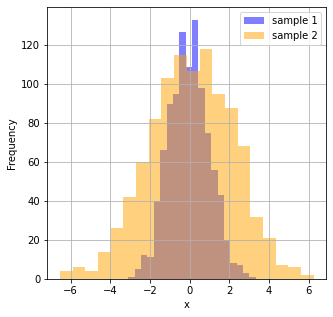

In [2]:
# Artificially generate two samples with variances s1 and s2
# For simplicity, assume they are drawn from distributions with equal population variance (sigma_1 = sigma_2)

n=1000 # n for each sample

m1, s1 = 0, 1 #mean, sigma
m2, s2 = 0, 2 #mean, sigma

samp1 = np.random.normal(loc=m1, scale=s1, size=n)
samp2 = np.random.normal(loc=m2, scale=s2, size=n)

# Plot the distributions
plt.figure(figsize=(5, 5))

plt.hist(samp1, bins=20, alpha=0.5, color='blue', label = 'sample 1')
plt.hist(samp2, bins=20, alpha=0.5, color='orange', label = 'sample 2')

plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

#### Seems easy enough to spot the difference in variances but let's explicitly conduct an f-test

In [3]:
# Perform F-test to compare variances
F = samp2.std()**2 / samp1.std()**2

#calculate our degrees of freedom
df1 = len(samp1) - 1
df2 = len(samp2) - 1

alpha = 0.05 #define sig level

#one-sided test:
#Ho: samp2 variance is not sig larger than samp1
#Ha: samp2 variance is larger than samp1
p_value =  1. - f.cdf(F, df1, df2)

# Print the results of the F-test
print(f'P-value from F-test: {p_value}')

if p_value < alpha:
    print(f'Reject Ho at the {alpha} significance level.')
else:
    print('Fail to reject Ho')

P-value from F-test: 1.1102230246251565e-16
Reject Ho at the 0.05 significance level.


#### Let's explore how the F-test behaves a bit more

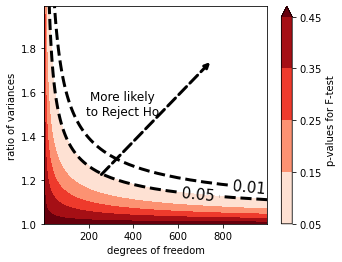

In [67]:
plt.figure(figsize=(5,4))
df = np.arange(1,1000) # an array of degrees of freedom-- represents changing sample sizes
F = np.arange(1,2,0.01)# an array representing ratio of our two variances >1, F stat
P= 1. - f.cdf(F[:,None], df[None,:], df[None,:]) #calculate the p-values for this matrix

#plot results
cf=plt.contourf(df,F,P, levels = np.arange(0.05,0.5,0.1), extend='max', cmap ='Reds')
plt.colorbar(cf, label = 'p-values for F-test') # add colorbar

#add contour lines at p=0.05 , p=0.01
ct=plt.contour( df,F,P, levels = [0.01, 0.05], linestyles='--', colors = 'k', linewidths=3)
plt.clabel(ct, ct.levels, inline=True, fontsize=15) # add contour labels

plt.annotate('', xy=(0.75, 0.75), xytext=(0.25, 0.22),
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=3,linestyle='--'),
            xycoords='axes fraction', textcoords='axes fraction')

plt.text(s='More likely\nto Reject Ho', x=0.35,y=0.5, ha='center', fontsize=12,transform=plt.gca().transAxes)

#add axes labels
plt.xlabel('degrees of freedom')
plt.ylabel('ratio of variances')
plt.show()